# Homework 2

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *ProShares Hedge Replication ETF*

***

# Class comments:
- The median hedge fund has a lower volatility than the S&P because they do hedge!
- The aggregate hedge funds index looks very much like SPY when you plot it (is there really a reason to doing it?)

# 1. The ProShares ETF Product

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

## 1. Alternative ETFs

Describe the two types of investments referenced by this term.

## Answer:
The two types of investments referenced by this term are Alterntive Investments and ETFs. 

While there is no uniform definition for an alternative investment, the criteria for a structured product to be classified as an alternative investment is based on the extent to which the product offers non-traditional risk and return exposure and requires investment management methods that differ markedly from traditional management methods [1]. Examples of alternative investments include hedge funds, private equity and real estate. 

ETFs, or Exchange Traded Funds, are a basket of securities that are traded through a brokerage firm or an an exchange [2]. 



[1] Chambers, D. R., Black, K. H., & Lacey, N. J. (2018). Alternative investments: A primer for investment professionals. CFA Institute Research Foundation

[2] Ferri, R. A. (2009). The ETF Book: All You Need to Know About Exchange-Traded Funds. United Kingdom: Wiley.

## 2. Hedge Funds.

a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

### Answer: 
2a) 1. Their ability to provide absolute returns in varied market conditions. 
    2. For risk diversification purposes. 

2b) By investing in hedge funds via an ETF, investors are not confronted by a minimum investment threshold or any restrictive terms and notice periods regarding withdrawals.Additionally, hedge fund strategies are often secret, which does not allow investors to fully understand the risk of their investment. Finally, by investing in hedge funds via an ETF, investors were spared the high fees charged by hedge funds. 

## 3. The Benchmarks

a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

## Answer: 

3a) HFRI is designed to replicated the collective performance of hedge funds through and equally weighted composite of over 2000 hedge funds. 

MLFM aimed to replicate hedge fund risk and return by using a rolling regression model to assign weights to each of: S&P 500, Russel 2000, MSCI EAFE, MSCI Emerging Markets, Euro/Dollar exhcange rate and the three month Eurodollar deposit yields. 

MLFM-ES extended upon MLFM by replacing Eurodollar deposit yields with US treasury bills and Euro/Dollar exhange rate with the ProShares UltraShort Euro (EUO). This was to ensure that all the constituent parts were tradeable. 

All of HFRI, MLFM and MLFM-ES are indicies and their purpose is to act as benchmarks, rather than be traded instruments. HDG differed in the sense that it was a product (ETF) offered by ProShares that investors could invest in. The purpose of this ETF is to track the MLFM-ES. 

3b) Well. It had a correlation coefficient of 90%. 

3c) 3-month T-Bills

3d) The Merrill Lynch Factor Model (MLFM) employs a rolling regression method, using only the past 24 months of return data. However, hedge funds frequently adjust their strategies in response to emerging market opportunities, which cannot be fully captured by a regression-based model reliant on historical data. Additionally, the MLFM uses a limited set of factors. While these factors may reflect some of the market exposures that hedge funds have, the idiosyncratic and complex strategies hedge funds employ often extend beyond the exposures represented by the model's constituents.



## 4. The HDG Product

a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

## Answer: 
4a) HDG attempts to track the MLFM-ES. 

4b) Althought HDG does not provide investors alpha, it gives the investors the opportunity to invest in an instrument that replicates the risk and return profile of hedge funds without the challenges of investing in a hedge fund directly. These challenges were outline in 2b.

4c) Sharpe Ratio = Excess Returns / Volatility

For a hedge fund: (0.1 - 0.02 - 0.2(0.08))/0.2 = 0.32
For HDG: (0.1 - 0.01)/0.2 = 0.45



***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `Sep 2024`.

## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data:

parent_path = os.path.dirname(os.getcwd()) # Get parent path (if using .ipynb file)
# parent_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__))) # Get parent path (if using .py file)
os.chdir(parent_path) # Set parent path as working directory (for reading and writing files)

descriptions = pd.read_excel("data/proshares_analysis_data.xlsx", sheet_name='descriptions', index_col=0)
returns_etf = pd.read_excel("data/proshares_analysis_data.xlsx", sheet_name='hedge_fund_series', index_col=0) # Assuming data is of excess returns
factors = pd.read_excel("data/proshares_analysis_data.xlsx", sheet_name='merrill_factors', index_col=0)
display(descriptions)
print('Returns ETF:')
display(returns_etf.head())
print('\nFactors:')
display(factors.head())


,security_name
EEM US Equity,iShares MSCI Emerging Markets
EFA US Equity,iShares MSCI EAFE ETF
EUO US Equity,ProShares UltraShort Euro
HDG US Equity,ProShares Hedge Replication ET
HEFA US Equity,iShares Currency Hedged MSCI E
HFRIFWI Index,HFR Fund Wghted Comp
IWM US Equity,iShares Russell 2000 ETF
MLEIFCTR Index,Merrill Lynch Factor Model Ind
MLEIFCTX Index,Merrill Lynch Factor Model Exc
QAI US Equity,NYLI Hedge Multi-Strategy Trac


Returns ETF:


,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
2011-08-31,-0.032149,-0.025588,-0.025689,-0.027036,-0.006489
2011-09-30,-0.038903,-0.032414,-0.032593,-0.032466,-0.022141
2011-10-31,0.026858,0.043593,0.043320,0.050531,0.025239
2011-11-30,-0.013453,-0.012142,-0.012431,-0.028608,-0.007964
2011-12-31,-0.004479,0.001938,0.001796,0.012875,0.001822



Factors:


,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
2011-08-31,-0.054976,0.000009,-0.092549,-0.087549,-0.005889,-0.088913
2011-09-30,-0.069420,0.000017,-0.179063,-0.108082,0.142180,-0.111505
2011-10-31,0.109147,-0.000013,0.162986,0.096274,-0.069502,0.151011
2011-11-30,-0.004064,0.000000,-0.019724,-0.021765,0.054627,-0.003784
2011-12-31,0.010449,0.000009,-0.042649,-0.021744,0.075581,0.005144


In [6]:
# Helper functions:

# Calculate the mean returns, standard deviation and Sharpe ratio for a given set of assets
def get_statistics(returns: pd.DataFrame):

    mean = returns.mean() * 12
    std = returns.std() * (12**0.5)
    sharpe = mean / std

    summary_statistics = pd.DataFrame({
        "Mean": mean,
        "Standard Deviation": std,
        "Sharpe Ratio": sharpe
    })
    summary_statistics.name = "Annualized statistics"

    return summary_statistics


# Get maximum drawdown for a given set of assets:
def get_maximum_drawdown(returns: pd.DataFrame):


    cum_returns = (1 + returns).cumprod()
    max_return = cum_returns.cummax()
    drawdown = cum_returns.div(max_return).sub(1)

    maximum_drawdown = drawdown.min()
    trough_date = drawdown[drawdown == maximum_drawdown].idxmin()
        
    recovery_date = pd.Series(index = trough_date.index, dtype='datetime64[ns]')
    peak_date = pd.Series(index = trough_date.index, dtype='datetime64[ns]')
    
    for asset in recovery_date.index:
        peak_date[asset] = cum_returns.loc[:trough_date[asset], asset].idxmax()
        drawdown_slice = drawdown.loc[trough_date[asset]:, asset]
        recovery_date[asset] = drawdown_slice[drawdown_slice == 0].idxmin()

    return maximum_drawdown, peak_date, trough_date, recovery_date


# Calculate excess skewness and kurtosis and some risk metrics for a given set of assets
def get_risk_measures(returns: pd.DataFrame):
        
        skewness = returns.skew()
        kurtosis = returns.kurtosis() # Excess kurtosis
        VaR_95 = returns.quantile(0.05)
        CVaR_95 = returns[returns < VaR_95].mean()
        maximum_drawdown, peak_date, trough_date, recovery_date = get_maximum_drawdown(returns)

        risk_metrics = pd.DataFrame({
            "Skewness": skewness,
            "(Excess) Kurtosis": kurtosis,
            "VaR 95%": VaR_95,
            "CVaR 95%": CVaR_95,
            "Maximum Drawdown": maximum_drawdown,
            "Peak Date": peak_date,
            "Trough Date": trough_date,
            "Recovery Date": recovery_date
        })
    
        return risk_metrics


# Regress the asset returns on factors and return the regression-based statistics:
def get_regression_statistics(
        returns_df: pd.DataFrame,
        regressors_df: pd.DataFrame,
        selected_regressors: list,
        intercept: bool = True,
        annual_factor = None,
        adjusted_r_squared: bool = False,
        correlation: bool = False,
        p_values: bool = False,
        tracking_error: bool = False,
        treynor_ratio: bool = False,
        information_ratio: bool = False):
    
    beta_columns = [f"Beta ({factor})" for factor in selected_regressors]
    p_values_columns = [f"P-value ({factor})" for factor in selected_regressors]
    correlation_columns = [f"Correlation ({factor})" for factor in selected_regressors]
    assets_names = list(returns_df.columns) if isinstance(returns_df, pd.DataFrame) else [returns_df.name]
    regression_statistics = pd.DataFrame(index=assets_names, columns=[])	
    if intercept == True:
        X_factors = sm.add_constant(regressors_df[selected_regressors]) if isinstance(regressors_df, pd.DataFrame) else sm.add_constant(regressors_df)
    else:
        X_factors = regressors_df[selected_regressors] if isinstance(regressors_df, pd.DataFrame) else regressors_df

    for asset in assets_names:
        # Fit the regression model: 
        Y_etf = returns_df[asset] if isinstance(returns_df, pd.DataFrame) else returns_df
        ols_model = sm.OLS(Y_etf, X_factors).fit()
        # Calculate residuals:
        residuals = ols_model.resid
        residuals_std_dev = residuals.std()

        # Calculate/get statistics:
        if intercept == True:
            regression_statistics.loc[asset, 'Alpha'] = ols_model.params.iloc[0] * 12 # Annualized Alpha

        if p_values == True and intercept == True: 
            regression_statistics.loc[asset, 'P-value (Alpha)'] = ols_model.pvalues.iloc[0] # Alpha p-value

        first_param = 1 if intercept == True else 0
        for i in range(first_param, len(ols_model.params)):
            regression_statistics.loc[asset, beta_columns[i-first_param]] = ols_model.params.iloc[i] # Betas
            if p_values == True: 
                regression_statistics.loc[asset, p_values_columns[i-first_param]] = ols_model.pvalues.iloc[i] # Beta p-values
            if correlation == True:
                if isinstance(regressors_df, pd.DataFrame):
                    regression_statistics.loc[asset, correlation_columns[i-first_param]] = Y_etf.corr(regressors_df[selected_regressors].sum(axis=1))
                else:
                    regression_statistics.loc[asset, correlation_columns[i-first_param]] = Y_etf.corr(regressors_df)

        if adjusted_r_squared == True:
            regression_statistics.loc[asset, 'Adj. R-squared'] = ols_model.rsquared_adj # Adjusted R-squared

        if tracking_error == True:
            regression_statistics.loc[asset, 'Tracking Error'] = residuals_std_dev * (12 ** 0.5) # Annualized Residuals Volatility

        if treynor_ratio == True:
            try:
                Y_projected = ols_model.predict(X_factors)
                regression_statistics['Treynor Ratio'] = Y_projected.mean() / regression_statistics['Beta (SPY US Equity)'] * 12 # Annualized Treynor Ratio
            except:
                print('SPY is not a factor in the regression. Treynor Ratio cannot be calculated.')

        if information_ratio == True: 
            regression_statistics.loc[asset, 'Information Ratio'] = regression_statistics.loc[asset, 'Alpha'] / residuals_std_dev * (12 ** 0.5) # Annualized Information Ratio

    return regression_statistics


''' Reference for the formula below: calc_correlations from portfolio_management_helper.py, by Fernando Rocha '''

# Calculate and return the correlation matrix of the returns of assets
def calc_correlations(returns: pd.DataFrame, return_heatmap: bool = True, print_highest_lowest: bool = True):
    returns = returns.copy()
    corr_matrix = returns.corr()
    
    if print_highest_lowest:
        highest_lowest_corr = corr_matrix.unstack().sort_values(ascending=True).reset_index().set_axis(['asset_1', 'asset_2', 'corr'], axis=1).loc[lambda df: df.asset_1 != df.asset_2]
        highest_corr = highest_lowest_corr.iloc[len(highest_lowest_corr)-1,:]
        lowest_corr = highest_lowest_corr.iloc[0,:]
        print(f"The highest correlation is between {highest_corr.asset_1} and {highest_corr.asset_2}: {highest_corr["corr"]:.2f}")
        print(f"The lowest correlation is between {lowest_corr.asset_1} and {lowest_corr.asset_2}: {lowest_corr["corr"]:.2f}")
    
    if return_heatmap:
        fig, ax = plt.subplots(figsize=(10, 7))
        corr_heatmap = sns.heatmap(corr_matrix, annot=True)
        return corr_heatmap
    
    else:
        return corr_matrix
    
    
# Perform a rolling regression on the ETF returns on the factors:
def rolling_windows_replication(returns: pd.Series,
                                factors: pd.DataFrame,
                                factors_list: list,
                                rolling_window: int,
                                intercept: bool):
    
    oos_index = returns.iloc[rolling_window:].index
    asset_returns_oos = pd.Series(index = oos_index, name = returns.name)

    for i in range(rolling_window, len(returns)):
        asset_returns_is = returns.iloc[i-rolling_window:i]
        factors_is = factors.iloc[i-rolling_window:i]
        regression_coeff = get_regression_statistics(asset_returns_is, 
                                                      factors_is, 
                                                      factors_list,
                                                      intercept = intercept)
        
        alpha = regression_coeff['Alpha'].iloc[0] if intercept == True else 0
        coeff_returns = regression_coeff.loc[:, regression_coeff.columns != 'Alpha'].values @ factors.iloc[i, :].values
        asset_returns_oos.iloc[i-rolling_window] = alpha + coeff_returns[0]
        
    return asset_returns_oos


In [7]:
# Calculate and display performance statistics (mean, standard deviation, Sharpe ratio) for the ETF returns:
display(get_statistics(returns_etf).style.format({"Mean": "{:.2%}","Standard Deviation": "{:.2%}","Sharpe Ratio": "{:.2f}"}))

,Mean,Standard Deviation,Sharpe Ratio
HFRIFWI Index,4.83%,5.95%,0.81
MLEIFCTR Index,3.63%,5.61%,0.65
MLEIFCTX Index,3.46%,5.60%,0.62
HDG US Equity,2.48%,5.84%,0.42
QAI US Equity,2.57%,5.00%,0.51


## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [8]:
# Calculate and display the risk measures (Skewness, (Excess) Kurtosis, VaR 95%, CVaR 95% and Maximum Drawdown) for the ETF returns
display(get_risk_measures(returns_etf).style.format({"Skewness": "{:.2f}",
                                                     "(Excess) Kurtosis": "{:.2f}",
                                                     "VaR 95%": "{:.2%}",
                                                     "CVaR 95%": "{:.2%}",
                                                     "Maximum Drawdown": "{:.2%}",
                                                     "Peak Date": "{:%Y-%m-%d}",
                                                     "Trough Date": "{:%Y-%m-%d}",
                                                     "Recovery Date": "{:%Y-%m-%d}"}))

,Skewness,(Excess) Kurtosis,VaR 95%,CVaR 95%,Maximum Drawdown,Peak Date,Trough Date,Recovery Date
HFRIFWI Index,-0.96,5.76,-2.43%,-3.75%,-11.55%,2019-12-31,2020-03-31,2020-08-31
MLEIFCTR Index,-0.27,1.63,-2.82%,-3.59%,-12.43%,2021-06-30,2022-09-30,2024-02-29
MLEIFCTX Index,-0.25,1.60,-2.81%,-3.58%,-12.44%,2021-06-30,2022-09-30,2024-02-29
HDG US Equity,-0.25,1.76,-3.09%,-3.76%,-14.07%,2021-06-30,2022-09-30,2024-07-31
QAI US Equity,-0.43,1.61,-1.79%,-3.27%,-13.77%,2021-06-30,2022-09-30,2024-02-29


## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [10]:
# Regress the ETF returns on SPY and display the regression-based statistics:
factors_list = ['SPY US Equity']
regression_statistics = get_regression_statistics(returns_etf, 
                                                  factors, 
                                                  factors_list, 
                                                  intercept = True,
                                                  adjusted_r_squared = True, 
                                                  correlation = True,
                                                  p_values = True, 
                                                  tracking_error = True, 
                                                  treynor_ratio = True, 
                                                  information_ratio = True)


# Format columns in display:
beta_format_dict = {f"Beta ({factor})": "{:.4f}" for factor in factors_list}
beta_pvalue_format_dict = {f"P-value ({factor})": "{:.2%}" for factor in factors_list}
format_dict = {
    "Alpha": "{:.2%}",
    "Adj. R-squared": "{:.2f}",
    "Treynor Ratio": "{:.4f}",
    "Information Ratio": "{:.2f}"
}
format_dict.update(beta_format_dict)
format_dict.update(beta_pvalue_format_dict)

# Display statistics
display(regression_statistics.style.format(format_dict))

,Alpha,P-value (Alpha),Beta (SPY US Equity),P-value (SPY US Equity),Correlation (SPY US Equity),Adj. R-squared,Tracking Error,Treynor Ratio,Information Ratio
HFRIFWI Index,-0.11%,0.900966,0.3461,0.00%,0.843493,0.71,0.031947,0.0741,-0.43
MLEIFCTR Index,-1.28%,0.089359,0.3434,0.00%,0.886595,0.78,0.025965,0.0747,-5.90
MLEIFCTX Index,-1.43%,0.057786,0.3422,0.00%,0.885924,0.78,0.025965,0.0750,-6.59
HDG US Equity,-2.55%,0.002173,0.3521,0.00%,0.873618,0.76,0.028422,0.0729,-10.76
QAI US Equity,-1.70%,0.020041,0.2984,0.00%,0.864767,0.75,0.025113,0.0860,-8.11


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.

*Answer:*
 - The SPY explains about 3/4 of the variation of the hedge-funds series returns, with a beta ("coefficient of variation") around 0.30-0.35.
 - The two ETFs (HDG and QAI) have a negative alpha (average monthly return beyond what is explained by SPY) at a significance level of 5%.
 - The three ETFs (HFRIFWI, MLEIFCTR and MLEIFCTX) does not have a non-zero alpha at a at a significance level of 5%.

 - Between HDG and QAI, QAI performs better at both the Treynor and Information ratio, which means that, for the same unit of the market risk factor (Beta SPY) exposure, QAI delivers a higher return. It also means that, the "sharpe ratio" of the return not explained by the regressors is (alpha + residual), is higher for QAI. 




## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

The highest correlation is between MLEIFCTR Index and MLEIFCTX Index: 1.00
The lowest correlation is between QAI US Equity and HFRIFWI Index: 0.85


<Axes: >

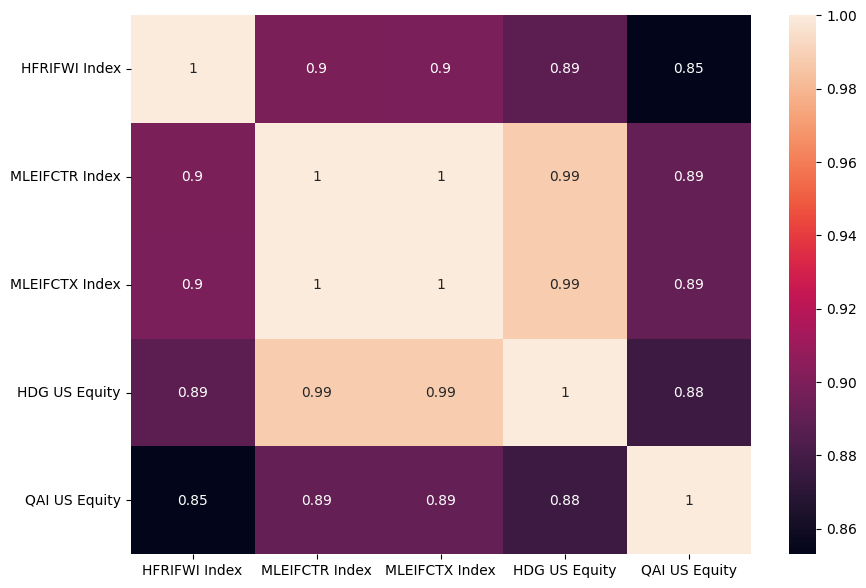

In [8]:
calc_correlations(returns_etf)


## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$\newcommand{\hfri}{\text{hfri}}$
$\newcommand{\merr}{\text{merr}}$

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{\merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\hat{r}^{\hfri}_{t} &= \hat{\alpha}^{\merr} + x_{t}^{\merr}\hat{\beta}^{\merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

a. Report the intercept and betas.
b. Are the betas realistic position sizes, or do they require huge long-short positions?
c. Report the R-squared.
d. Report the volatility of $\epsilon^{\merr}$, the tracking error.

In [9]:
asset_returns = returns_etf['HFRIFWI Index']
factors_list = list(factors.columns)
regression_statistics = get_regression_statistics(asset_returns, 
                                                  factors, 
                                                  factors_list, 
                                                  intercept = True,
                                                  adjusted_r_squared = True, 
                                                  correlation = True,
                                                  p_values = True, 
                                                  tracking_error = True)

# Format columns in display:
beta_format_dict = {f"Beta ({factor})": "{:.2f}" for factor in factors_list}
alpha_pvalue_format_dict = {f"P-value (Alpha)": "{:.2f}" for factor in factors_list}
beta_pvalue_format_dict = {f"P-value ({factor})": "{:.2f}" for factor in factors_list}
format_dict = {
    "Alpha": "{:.2%}",
    "Adj. R-squared": "{:.2f}",
    "Tracking Error": "{:.2%}"
}
format_dict.update(beta_format_dict)
format_dict.update(alpha_pvalue_format_dict)
format_dict.update(beta_pvalue_format_dict)

# Display statistics
display(regression_statistics.style.format(format_dict))


,Alpha,P-value (Alpha),Beta (SPY US Equity),P-value (SPY US Equity),Beta (USGG3M Index),P-value (USGG3M Index),Beta (EEM US Equity),P-value (EEM US Equity),Beta (EFA US Equity),P-value (EFA US Equity),Beta (EUO US Equity),P-value (EUO US Equity),Beta (IWM US Equity),P-value (IWM US Equity),Adj. R-squared,Tracking Error
HFRIFWI Index,1.48%,0.09,0.04,0.29,0.15,0.70,0.08,0.00,0.08,0.01,0.03,0.09,0.15,0.00,0.83,2.38%


- The betas are realistic position sizes. However, only the betas for EEM, EFA and IWM are significant at a 95% significance level. The betas for SPY and USGG3M are not significant.

## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\merr}_{t}$ and $\tilde{\beta}^{\merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\hfri}_{t} \equiv \tilde{\alpha}^{\merr} + (x_{t}^{\merr})'\tilde{\beta}^{\merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

In [10]:
rolling_window = 60
asset_returns_oos = rolling_windows_replication(asset_returns, factors, factors_list, rolling_window, intercept = True)

# Calculate the out-of-sample portfolio replication statistics:
asset_returns_actual =  returns_etf['HFRIFWI Index'].iloc[rolling_window:]

replication_statistics = get_regression_statistics(asset_returns_oos,
                          asset_returns_actual,
                          [asset_returns_actual.name],
                          intercept = False,
                          adjusted_r_squared = False,
                          correlation = True,
                          p_values = False,
                          tracking_error = True
                          )


beta_format_dict = {f"Beta ({asset_returns_actual.name})": "{:.2f}" for factor in factors_list}
format_dict = {
    "Alpha": "{:.2%}",
    f"Correlation ({asset_returns_actual.name})": "{:.2f}",
    "Tracking Error": "{:.2%}"
}
format_dict.update(beta_format_dict)

# Display statistics
display(replication_statistics.style.format(format_dict))


,Beta (HFRIFWI Index),Correlation (HFRIFWI Index),Tracking Error
HFRIFWI Index,1.04,0.57,7.21%


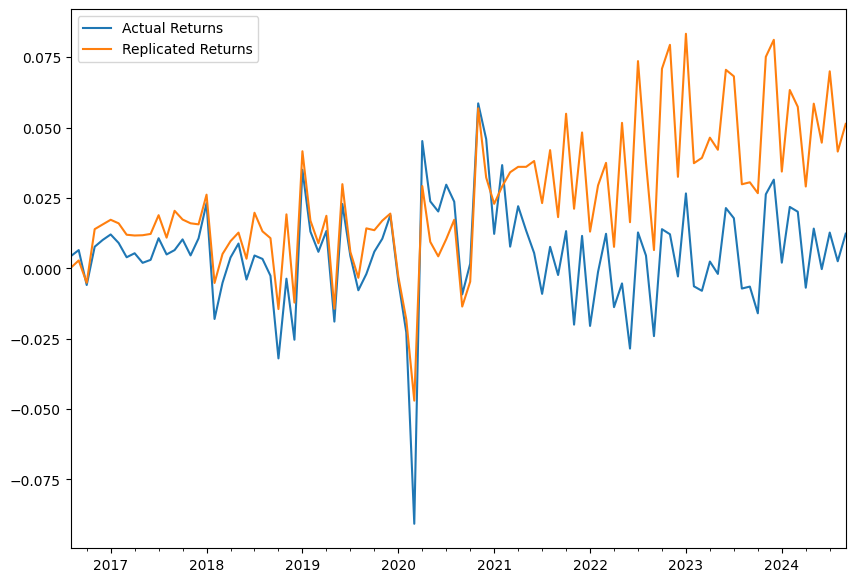

In [12]:
# Plot the actual and out-of-sample replicated returns:
fig, ax = plt.subplots(figsize=(10, 7))

# Ensure the index is datetime
asset_returns_oos.index = pd.to_datetime(asset_returns_oos.index)
asset_returns_actual.index = pd.to_datetime(asset_returns_actual.index)

asset_returns_actual.plot(ax=ax, label='Actual Returns')

# Check if asset_returns_oos is not empty before plotting
if not asset_returns_oos.empty:
    asset_returns_oos.plot(ax=ax, label='Replicated Returns')

plt.legend()
plt.show()


## 8.

We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\check{r}^{\hfri}_{t} &= \check{\alpha}^{\merr} + x_{t}^{\merr}\check{\beta}^{\merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\merr}$?

* the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

In [10]:
regression_statistics = get_regression_statistics(asset_returns, 
                                                  factors, 
                                                  factors_list, 
                                                  intercept = False,
                                                  adjusted_r_squared = True, 
                                                  correlation = False,
                                                  p_values = True, 
                                                  tracking_error = True)

# Format columns in display:
beta_format_dict = {f"Beta ({factor})": "{:.2f}" for factor in factors_list}
beta_pvalue_format_dict = {f"P-value ({factor})": "{:.2f}" for factor in factors_list}
format_dict = {
    "Adj. R-squared": "{:.2f}",
    "Tracking Error": "{:.2%}"
}
format_dict.update(beta_format_dict)
format_dict.update(beta_pvalue_format_dict)

# Display statistics
display(regression_statistics.style.format(format_dict))

,Beta (SPY US Equity),P-value (SPY US Equity),Beta (USGG3M Index),P-value (USGG3M Index),Beta (EEM US Equity),P-value (EEM US Equity),Beta (EFA US Equity),P-value (EFA US Equity),Beta (EUO US Equity),P-value (EUO US Equity),Beta (IWM US Equity),P-value (IWM US Equity),Adj. R-squared,Tracking Error
HFRIFWI Index,0.05,0.13,0.50,0.12,0.08,0.00,0.08,0.02,0.03,0.07,0.14,0.00,0.84,2.39%


***

In [14]:
rolling_window = 60
asset_returns_oos_no_intercept = rolling_windows_replication(asset_returns, factors, factors_list, rolling_window, intercept = False)

# Calculate the out-of-sample portfolio replication statistics:
asset_returns_actual =  returns_etf['HFRIFWI Index'].iloc[rolling_window:]

replication_statistics = get_regression_statistics(asset_returns_oos_no_intercept,
                          asset_returns_actual,
                          [asset_returns_actual.name],
                          intercept = False,
                          adjusted_r_squared = False,
                          correlation = True,
                          p_values = False,
                          tracking_error = True
                          )


beta_format_dict = {f"Beta ({asset_returns_actual.name})": "{:.2f}" for factor in factors_list}
format_dict = {
    "Alpha": "{:.2%}",
    f"Correlation ({asset_returns_actual.name})": "{:.2f}",
    "Tracking Error": "{:.2%}"
}
format_dict.update(beta_format_dict)

# Display statistics
display(replication_statistics.style.format(format_dict))


,Beta (HFRIFWI Index),Correlation (HFRIFWI Index),Tracking Error
HFRIFWI Index,0.85,0.89,2.77%


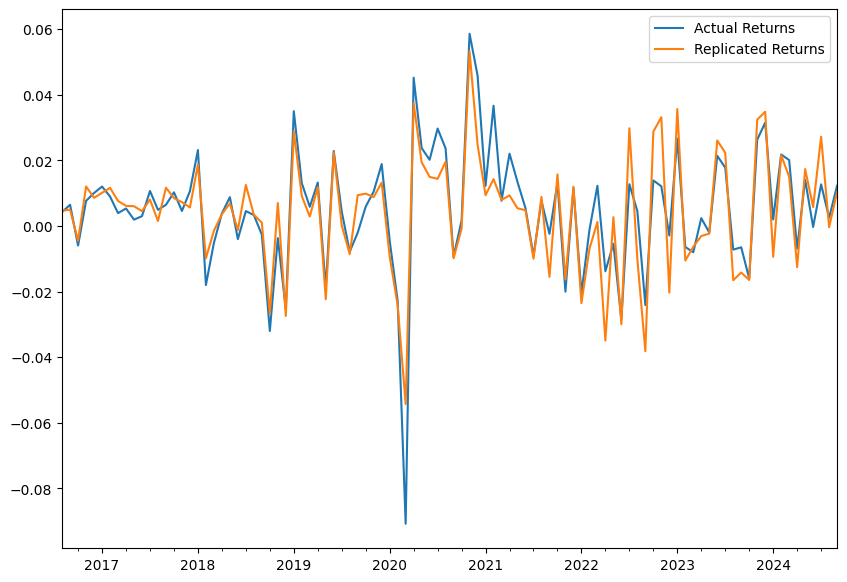

In [15]:
# Plot the actual and out-of-sample replicated returns:
fig, ax = plt.subplots(figsize=(10, 7))

# Ensure the index is datetime
asset_returns_oos_no_intercept.index = pd.to_datetime(asset_returns_oos_no_intercept.index)
asset_returns_actual.index = pd.to_datetime(asset_returns_actual.index)

asset_returns_actual.plot(ax=ax, label='Actual Returns')

# Check if asset_returns_oos is not empty before plotting
if not asset_returns_oos_no_intercept.empty:
    asset_returns_oos_no_intercept.plot(ax=ax, label='Replicated Returns')

plt.legend()
plt.show()

*In-sample data*:
- The regression without the intercept presented an Adjusted R-Squared, Tracking error and betas very close to the ones with the intercept.
- The only betas with different values are not significant at a 5% level of significance in both cases.

*Out-of-sample data:*
- The replicated portfolio regression without the intercept presented a higher correlation with the actual asset (0.89), when compared to when regressed with intercept (0.57). 
- Additionally, the annualized tracking error was significant smaller as well (2.77% without intercept vs. 7.21% with intercept).

- We believe Merrill and ProShares fit their replicators with without the intercept. Since the replicators would not involve some active alpha-seeking strategy to account for the intercept, and the objective is to indeed replicate the index using some factors, it makes sense to use the factors to explain the level of returns as well.

# 3.  Extensions
<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. 

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`. 
* Try using GLM in statsmodels.

## 2. 

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

## 3. 

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

## 4.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3. 

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

***